In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### 3.1.1 Reactores Discontinuos (BR)

#### 3.1.1.3 Ejemplo de aplicación numérica

Considere la reacción prototipo:

$$\mathrm{A \longrightarrow B}$$

Con una ley de velocidad de reacción de orden uno:

$$r_{A} = -k C_{\mathrm{A}}$$

La trayectoria de la reacción está dada por el siguiente sistema de ecuaciones diferenciales ordinarias:

$$\frac{dN_A}{dt} =  r_{\mathrm{A}} V$$
$$\frac{dN_B}{dt} =  -r_{\mathrm{A}} V$$

In [ ]:
def batch_reactor(t, m, k, V):
    mA, mB = m
    cA, cB = mA/V, mB/V
    rA = -k*cA
    dNA_dt = rA*V; dNB_dt = -rA*V
    return np.array([dNA_dt, dNB_dt])

# Terminar el cálculo si el reactivo A es consumido completamente
def Aconsumed(t, m, k, V): return m[0] 
Aconsumed.terminal = True

In [ ]:
# parámetros de entrada para solución del sistema de ecuaciones diferenciales ordinarias
k = 1e-3 # constante de reacción orden uno, en [s.^-1]
m0 = np.array([1, 0]) # concentraciones iniciales de [A, B, C], en [u.a.]
V = 3 # m^3
t_span = (0, 3600) # rango de tiempo para integración, en [u.a.]
dt = 10 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol1 = solve_ivp(batch_reactor, t_span, y0=m0, args=(k, V,), events=Aconsumed, t_eval=t_eval)

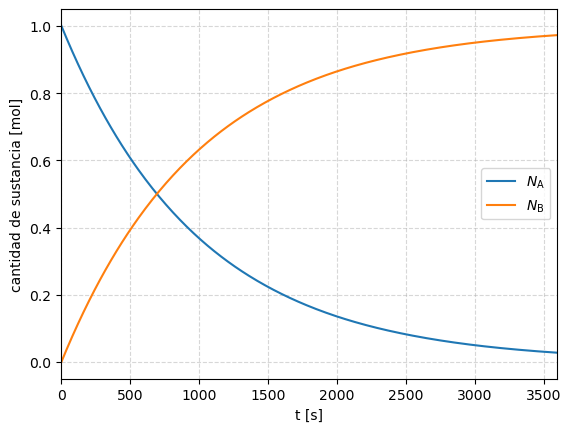

In [ ]:
fig, ax = plt.subplots()
ax.plot(sol1.t, sol1.y[0], label=r"$N_{\mathrm{A}}$")
ax.plot(sol1.t, sol1.y[1], label=r"$N_{\mathrm{B}}$")
ax.set(xlim=t_span, xlabel='t [s]', ylabel='cantidad de sustancia [mol]')
ax.grid(ls="--", alpha=0.5)
ax.legend()
plt.show()

### 3.1.2 Reactor Agitado de Flujo Continuo (CSTR)

#### 3.1.2.3 Ejemplo de aplicación numérica

Considere la reacción prototipo:

$$\mathrm{A \longrightarrow B}$$

Con una ley de velocidad de reacción de orden uno:

$$r_{A} = -k C_{\mathrm{A}}$$

La trayectoria de la reacción está dada por la ecuación algebraica:

$$V = \frac{\dot{Q} (C_{\mathrm{A_0}} - C_{\mathrm{A}})}{-r_{\mathrm{A}}}$$

In [ ]:
def cstr(Q, r, c0, c):
    return (Q*(c0-c))/(-r)

In [ ]:
# parámetros de entrada para solución la ecuación algebraica
k = 1e0 # constante de reacción orden uno, en [s.^-1]
c0, c = 1, 0.01
rA = -k*c

Q = np.linspace(0, 10, 21) # m3/s
V = np.zeros_like(Q)

for i, q in enumerate(Q):
    V[i] = cstr(q, rA, c0, c)

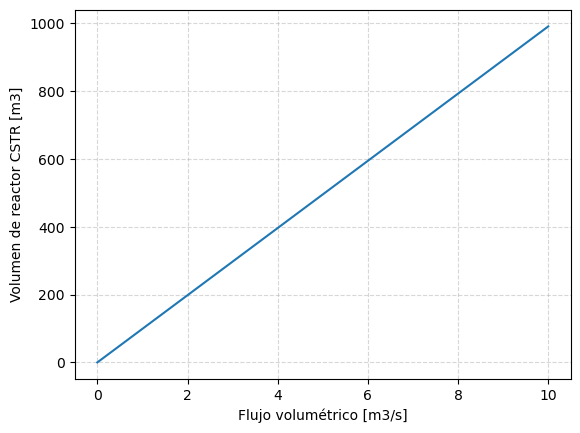

In [ ]:
fig, ax = plt.subplots()
ax.plot(Q, V)
ax.set(xlabel='Flujo volumétrico [m3/s]', ylabel='Volumen de reactor CSTR [m3]')
ax.grid(ls="--", alpha=0.5)
plt.show()

### 3.1.3 Reactor de flujo pistón (PFR)

#### 3.1.3.3 Ejemplo de aplicación numérica

Considere la reacción prototipo:

$$\mathrm{A \longrightarrow B}$$

Con una ley de velocidad de reacción de orden uno:

$$r_{A} = -k C_{\mathrm{A}}$$

La trayectoria de la reacción está dada por la ecuación diferencial:

$$\frac{dF_{j}}{dV} = r_j$$

In [ ]:
def pfr(V, F, r):
    fA, fB = F
    r = 
    return 

SyntaxError: invalid syntax (3010892162.py, line 3)

In [ ]:
# parámetros de entrada para solución la ecuación algebraica
k = 1e0 # constante de reacción orden uno, en [s.^-1]
c0, c = 1, 0.01
rA = -k*c

Q = np.linspace(0, 10, 21) # m3/s
V = np.zeros_like(Q)

for i, q in enumerate(Q):
    V[i] = cstr(q, rA, c0, c)

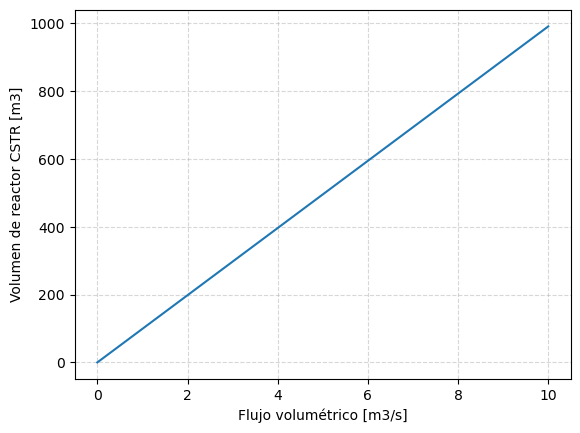

In [ ]:
fig, ax = plt.subplots()
ax.plot(Q, V)
ax.set(xlabel='Flujo volumétrico [m3/s]', ylabel='Volumen de reactor CSTR [m3]')
ax.grid(ls="--", alpha=0.5)
plt.show()